In [137]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
#file to load
#Add your file path here
#_daily_stock_yahoo
stock_path = os.path.join("Resources","FB_daily_stock_yahoo.csv")
int_rate_path = os.path.join("Resources","FEDFUNDS.csv")

In [139]:
stock = pd.read_csv(stock_path)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [140]:
#The effective federal funds rate is the interest rate banks charge each other for overnight loans to meet their reserve requirements. 
#Also known as the federal funds rate, the effective federal funds rate is set by the Federal Open Market Committee, or FOMC. 
#The effective federal funds rate is the most influential interest rate in the nation’s economy. It affects employment, growth and inflation.
effr = pd.read_csv(int_rate_path)
effr.head()

,Date,Federal Funds Rate
0,2016-01-01,0.34
1,2016-02-01,0.38
2,2016-03-01,0.36
3,2016-04-01,0.37
4,2016-05-01,0.37


In [141]:
#Get the average stock price per month
stock["YYYY-MM"] = [x[:7] for x in stock["Date"]]
stock_grouped = stock.groupby("YYYY-MM")
stock_monthly = pd.DataFrame(stock_grouped["Close"].mean())
stock_monthly["Year Month"] = pd.to_datetime(stock_monthly.index)
stock_monthly.head()

,Close,Year Month
YYYY-MM,,
2017-01,126.817499,2017-01-01
2017-02,133.830525,2017-02-01
2017-03,139.408261,2017-03-01
2017-04,142.965263,2017-04-01
2017-05,150.234093,2017-05-01


In [142]:
merge_table = pd.merge(stock, effr, on="Date", how="inner")
merge_table

,Date,Open,High,Low,Close,Adj Close,Volume,YYYY-MM,Federal Funds Rate
0,2017-02-01,132.250000,133.490005,130.679993,133.229996,133.229996,50139800,2017-02,0.66
1,2017-03-01,136.470001,137.479996,136.300003,137.419998,137.419998,16257000,2017-03,0.79
2,2017-05-01,151.740005,152.570007,151.419998,152.460007,152.460007,25218300,2017-05,0.91
3,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600,2017-06,1.04
4,2017-08-01,169.820007,170.470001,169.050003,169.860001,169.860001,14385000,2017-08,1.16
5,2017-09-01,172.399994,172.919998,171.309998,172.020004,172.020004,11677600,2017-09,1.15
6,2017-11-01,182.360001,182.899994,180.570007,182.660004,182.660004,40918300,2017-11,1.16
7,2017-12-01,176.029999,177.479996,172.339996,175.100006,175.100006,20182500,2017-12,1.30
8,2018-02-01,188.220001,195.320007,187.889999,193.089996,193.089996,54211300,2018-02,1.42
9,2018-03-01,179.009995,180.119995,174.410004,175.940002,175.940002,23201600,2018-03,1.51


In [143]:
# Obtain coordinates to plot graph
stock = merge_table[["Date", "Close","Federal Funds Rate"]]
stock.head()

,Date,Close,Federal Funds Rate
0,2017-02-01,133.229996,0.66
1,2017-03-01,137.419998,0.79
2,2017-05-01,152.460007,0.91
3,2017-06-01,151.529999,1.04
4,2017-08-01,169.860001,1.16


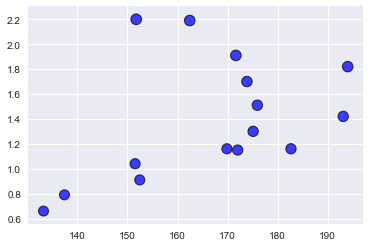

In [150]:
plt.scatter(stock["Close"], stock["Federal Funds Rate"], linewidth=1, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)

In [146]:
#correlation between the variables in the dataset
effr.corr()
stock.corr()

,Close,Federal Funds Rate
Close,1.000000,0.411537
Federal Funds Rate,0.411537,1.000000


In [134]:
#train out regression model--first split up our data into an X array that contains the features to train on, 
#and a y array with the target variable
x = effr['Federal Funds Rate']
y = stock['Close']

In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

ValueError: Found input variables with inconsistent numbers of samples: [36, 15]